In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from ssapp.Utils import FigureSaver

def get_training_csv_path(csv_name: str,subfolder,ekstra_back_steps: int = 0):

    main_dir = Path().cwd().parents[1+ekstra_back_steps]
    models_dir = main_dir / 'models'
    subdict_dir = models_dir / 'CSV Training Data'
    csv_dir = subdict_dir / subfolder / csv_name

    return csv_dir


class CSVLoader():
    """
    Loads the training csv file and returns a pandas dataframe.
    """
    def __init__(self, subfolder):
        self.subfolder = subfolder
        

    def load(self,name):
        self.path = get_training_csv_path(name,self.subfolder)
        return pd.read_csv(self.path)


figSaver = FigureSaver(subfolder='NN Training Plots',default_format='png',dpi = 600)

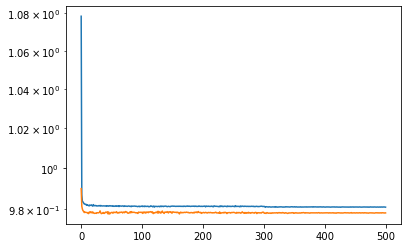

In [20]:
csvLoader = CSVLoader(subfolder = 'VAE')
VAE_Data = csvLoader.load('VAE_CHA_Training.csv')


plt.figure()
plt.semilogy(VAE_Data['Step'],VAE_Data['graceful-water-8 - Train_loss'])
plt.semilogy(VAE_Data['Step'],VAE_Data['graceful-water-8 - Val_loss'])

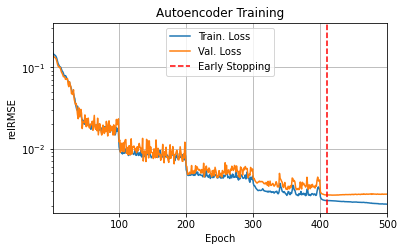

In [29]:
csvLoader = CSVLoader('AE')
AE_Data = csvLoader.load('Deft-plasma Training.csv')

plt.figure(figsize = (6,3.5))
plt.semilogy(AE_Data['Step'],AE_Data['deft-plasma-3 - Training Rec. Loss'],label = 'Train. Loss')
plt.semilogy(AE_Data['Step'],AE_Data['deft-plasma-3 - Validation Rec. Loss'],label = 'Val. Loss')
plt.title('Autoencoder Training')
plt.xlabel('Epoch')
plt.axvline(410,color = 'r',label = 'Early Stopping',linestyle = '--')
plt.legend()
plt.ylabel('relRMSE')
plt.grid()
plt.xlim(1,500)

figSaver('Autoencoder_Training')

,Step,chocolate-sound-430 - Test_loss,chocolate-sound-430 - Test_loss__MIN,chocolate-sound-430 - Test_loss__MAX,chocolate-sound-430 - Train_loss,chocolate-sound-430 - Train_loss__MIN,chocolate-sound-430 - Train_loss__MAX,chocolate-sound-430 - Val_loss,chocolate-sound-430 - Val_loss__MIN,chocolate-sound-430 - Val_loss__MAX
0,0,0.267557,0.267557,0.267557,0.330148,0.330148,0.330148,0.268111,0.268111,0.268111
1,1,0.262281,0.262281,0.262281,0.262144,0.262144,0.262144,0.262244,0.262244,0.262244
2,2,0.256489,0.256489,0.256489,0.258831,0.258831,0.258831,0.257031,0.257031,0.257031
3,3,0.250090,0.250090,0.250090,0.259904,0.259904,0.259904,0.249359,0.249359,0.249359
4,4,0.238082,0.238082,0.238082,0.247933,0.247933,0.247933,0.239733,0.239733,0.239733
...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.001440,0.001440,0.001440,0.000490,0.000490,0.000490,0.001416,0.001416,0.001416
3996,3996,0.001440,0.001440,0.001440,0.000490,0.000490,0.000490,0.001416,0.001416,0.001416
3997,3997,0.001440,0.001440,0.001440,0.000490,0.000490,0.000490,0.001416,0.001416,0.001416
3998,3998,0.001440,0.001440,0.001440,0.000490,0.000490,0.000490,0.001416,0.001416,0.001416


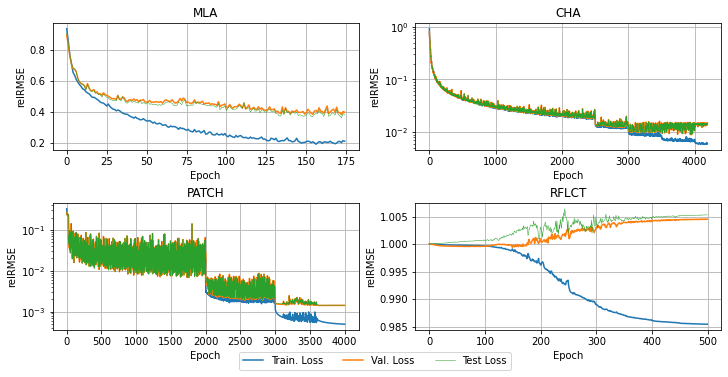

In [94]:
csvLoader = CSVLoader('PDNN')
MLA_PDNN_Data = csvLoader.load('fast_brook_MLA_PDNN.csv')
PATCH_PDNN_Data = csvLoader.load('PATCH_PDNN_Chocolate_sound.csv')
CHA_PDNN_Data = csvLoader.load('polished_Universer_CHA_PDNN_Training.csv')
RFLCT_PDNN_Data = csvLoader.load('RFLCT_train.csv')

train_data_list = [MLA_PDNN_Data,PATCH_PDNN_Data,CHA_PDNN_Data]



display(PATCH_PDNN_Data)

fig, axs = plt.subplots(ncols=2,nrows=2,figsize = (10,5),constrained_layout=True)

axs[0,0].plot(MLA_PDNN_Data['Step'],MLA_PDNN_Data['fast-brook-7 - Train_loss'])
axs[0,0].plot(MLA_PDNN_Data['Step'],MLA_PDNN_Data['fast-brook-7 - Val_loss'])
axs[0,0].plot(MLA_PDNN_Data['Step'],MLA_PDNN_Data['fast-brook-7 - Test_loss'],linewidth = 0.5)
axs[0,0].set_title('MLA')

axs[1,0].semilogy(PATCH_PDNN_Data['Step'],PATCH_PDNN_Data['chocolate-sound-430 - Train_loss'])
axs[1,0].plot(PATCH_PDNN_Data['Step'],PATCH_PDNN_Data['chocolate-sound-430 - Val_loss'])
axs[1,0].plot(PATCH_PDNN_Data['Step'],PATCH_PDNN_Data['chocolate-sound-430 - Test_loss'],linewidth = 0.5)
axs[1,0].set_title('PATCH')

axs[0,1].semilogy(CHA_PDNN_Data['Step'],CHA_PDNN_Data["polished-universe-62 - Train_loss"])
axs[0,1].plot(CHA_PDNN_Data['Step'],CHA_PDNN_Data['polished-universe-62 - Test_loss'])
axs[0,1].plot(CHA_PDNN_Data['Step'],CHA_PDNN_Data['polished-universe-62 - Test_loss'],linewidth = 0.5)
axs[0,1].set_title('CHA')

axs[1,1].plot(RFLCT_PDNN_Data['Step'],RFLCT_PDNN_Data["celestial-jazz-4 - Train_loss"])
axs[1,1].plot(RFLCT_PDNN_Data['Step'],RFLCT_PDNN_Data['celestial-jazz-4 - Val_loss'])
axs[1,1].plot(RFLCT_PDNN_Data['Step'],RFLCT_PDNN_Data['celestial-jazz-4 - Test_loss'],linewidth = 0.5)
axs[1,1].set_title('RFLCT')

for ax in axs.flatten():
    ax.set_xlabel('Epoch')
    ax.set_ylabel('relRMSE')
    ax.grid()

fig.legend(['Train. Loss','Val. Loss','Test Loss'],loc = 'lower center',ncol = 3,bbox_to_anchor=(0.515,-0.03))

figSaver('PDNN_Training')

,Step,deft-plasma-3 - Training Rec. Loss,deft-plasma-3 - Training Rec. Loss__MIN,deft-plasma-3 - Training Rec. Loss__MAX,deft-plasma-3 - Validation Rec. Loss,deft-plasma-3 - Validation Rec. Loss__MIN,deft-plasma-3 - Validation Rec. Loss__MAX
0,0,0.274943,0.274943,0.274943,0.140416,0.140416,0.140416
1,1,0.150129,0.150129,0.150129,0.137036,0.137036,0.137036
2,2,0.144764,0.144764,0.144764,0.135872,0.135872,0.135872
3,3,0.142568,0.142568,0.142568,0.133078,0.133078,0.133078
4,4,0.140864,0.140864,0.140864,0.131178,0.131178,0.131178
...,...,...,...,...,...,...,...
495,495,0.002090,0.002090,0.002090,0.002766,0.002766,0.002766
496,496,0.002092,0.002092,0.002092,0.002757,0.002757,0.002757
497,497,0.002089,0.002089,0.002089,0.002764,0.002764,0.002764
498,498,0.002087,0.002087,0.002087,0.002765,0.002765,0.002765


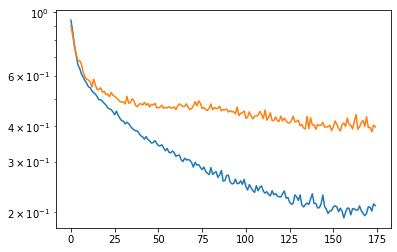

In [23]:
MLA_PDNN_Data = csvLoader.load('fast_brook_MLA_PDNN.csv')

display(AE_Data)

plt.figure()
plt.semilogy(MLA_PDNN_Data['Step'],MLA_PDNN_Data['fast-brook-7 - Train_loss'])
plt.semilogy(MLA_PDNN_Data['Step'],MLA_PDNN_Data['fast-brook-7 - Val_loss'])

def loadCSVandPlotTraining(csv_name: str,ekstra_back_steps: int = 0):
    """
    Loads the training csv file and plots the training and validation loss.
    """
    csv_dir = get_training_csv_path(csv_name,subfolder,ekstra_back_steps)
    csv_data = pd.read_csv(csv_dir)
    plt.figure()
    plt.semilogy(csv_data['Step'],csv_data['graceful-water-8 - Train_loss'])
    plt.semilogy(csv_data['Step'],csv_data['graceful-water-8 - Val_loss'])
    plt.show()
    return csv_data